### 7CCSMCMP (Computer Programming)
# Coursework 2 
# DUE ON KEATs BY SUNDAY 27th November 23:55

This is the second programming assigment for this module.  

- It is worth 5% of your final grade.  
- Do your work for this assignment in the cells of this jupyter notebook.  You should be able to fit the code required for this assignment in this notebook.
- This notebook comes with a ```data/``` directory that holds the assignment data for this exercise.
- You must do ***your own work***, there is no ***collaborating*** allowed.
- Make sure that you properly ```comment``` your code, so that the grader can understand what your program is doing.  ***Uncommented code will result in loss of marks!***

## Your Details
Edit this Markdown cell with:

- *Sari Nusier*
- *1317015*

## Part 1 [55 points in total]

In this exercise, you will be exploring flight delay data in the United States as provided by [US Department of Transportation](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time).  

In the data/ directory you will find the .csv file for September 2015 (```ontime_flights_sept2015.csv```). 

Name | Description
--- | ---
YEAR | 2015
MONTH | 9
DAY_OF_MONTH | 1-30
DAY_OF_WEEK	| 1 (Monday) - 7 (Sunday)
UNIQUE_CARRIER | unique carrier code (see carriers.csv for look-up table)
TAIL_NUM | plane tail number
FL_NUM | flight number
ORIGIN |origin IATA airport code (see airports.csv for look-up table)
DEST | destination IATA airport code
CRS_DEP_TIME | scheduled departure time (local, hhmm)
DEP_TIME | actual departure time (local, hhmm)
CRS_ARR_TIME | scheduled arrival time (local, hhmm)
ARR_TIME | actual arrival time (local, hhmm)
ARR_DELAY | arrival delay, in minutes
CANCELLED | was the flight cancelled?
CANCELLATION_CODE |reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
DIVERTED | 1 = yes, 0 = no
CRS_ELAPSED_TIME | in minutes
ACTUAL_ELAPSED_TIME	| in minutes
AIR_TIME | in minutes
DISTANCE | in miles
CARRIER_DELAY | in minutes
WEATHER_DELAY | in minutes
NAS_DELAY | in minutes
SECURITY_DELAY | in minutes
LATE_AIRCRAFT_DELAY | in minutes

Answer each of the questions below, and include a short explanation for each answer or plot that you generate (use a Markdown cell to write your explanation).

To get you started, the dataset is loaded into a Pandas DataFrame, and the columns are listed for you. (*Note*: ignore the last columns "Unnamed: 26", this is due to a dangling comma on every line")

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
flights = pd.read_csv("data/ontime_flights_sept2015_full.csv")
print flights.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'UNIQUE_CARRIER',
       u'TAIL_NUM', u'FL_NUM', u'ORIGIN', u'DEST', u'CRS_DEP_TIME',
       u'DEP_TIME', u'CRS_ARR_TIME', u'ARR_TIME', u'ARR_DELAY', u'CANCELLED',
       u'CANCELLATION_CODE', u'DIVERTED', u'CRS_ELAPSED_TIME',
       u'ACTUAL_ELAPSED_TIME', u'AIR_TIME', u'DISTANCE', u'CARRIER_DELAY',
       u'WEATHER_DELAY', u'NAS_DELAY', u'SECURITY_DELAY',
       u'LATE_AIRCRAFT_DELAY', u'Unnamed: 26'],
      dtype='object')


**Question 1.1 [5 points]** How many flights where recorded in the month of September?

In [3]:
print len(flights[flights.MONTH == 9])

464946


**Question 1.2 [10 points]** In which direction do flights between JFK (New York City) and LAX (Los Angelos) take less time, JFK->LAX or LAX->JFK?  (Explain your calculations)

**Question 1.3 [5 points]** On average, what is the difference in minutes between the two directions?

In [4]:
# We are declaring two variables (both ways) to hold the means for 
# each relevant column (CRS_ELAPSED_TIME and ACTUAL_ELAPSED_TIME).

lax_to_jfk_CRS = flights[(flights.ORIGIN == "LAX") & (flights.DEST == "JFK")].CRS_ELAPSED_TIME.mean()
jfk_to_lax_CRS = flights[(flights.ORIGIN == "JFK") & (flights.DEST == "LAX")].CRS_ELAPSED_TIME.mean()
lax_to_jfk_actual = flights[(flights.ORIGIN == "LAX") & (flights.DEST == "JFK")].ACTUAL_ELAPSED_TIME.mean()
jfk_to_lax_actual = flights[(flights.ORIGIN == "JFK") & (flights.DEST == "LAX")].ACTUAL_ELAPSED_TIME.mean()

# Printing the mean values for each way as given by the CRS_ELAPSED_TIME column.
print("LAX -> JFK CRS ELAPSED TIME:")
print lax_to_jfk_CRS
print("JFK -> LAX CRS ELAPSED TIME:")
print jfk_to_lax_CRS

if jfk_to_lax_CRS == lax_to_jfk_CRS:
    print("They are both equal\n")
elif jfk_to_lax_CRS > lax_to_jfk_CRS:
    print("LAX to JFK is faster\n")
else:
    print("JFK to LAX is faster\n")

# Printing the mean values for each way as given by the ACTUAL_ELAPSED_TIME column.
print("LAX -> JFK ACTUAL ELAPSED TIME:")
print lax_to_jfk_actual
print("JFK -> LAX ACTUAL ELAPSED TIME:")
print jfk_to_lax_actual

if jfk_to_lax_actual == lax_to_jfk_actual:
    print("They are both equal\n")
elif jfk_to_lax_actual > lax_to_jfk_actual:
    print("LAX to JFK is faster\n")
else:
    print("JFK to LAX is faster\n")
    
    
# We calculate the average difference as the absolute value of the difference of averages, 
# allowing us to reuse the variables from the previous exercise. 
print("Difference in minutes for CRS_ELAPSED_TIME:")
print(abs(lax_to_jfk_CRS - jfk_to_lax_CRS))

print("Difference in minutes for ACTUAL_ELAPSED_TIME:")
print(abs(lax_to_jfk_actual - jfk_to_lax_actual))



LAX -> JFK CRS ELAPSED TIME:
331.010978957
JFK -> LAX CRS ELAPSED TIME:
368.594693504
LAX to JFK is faster

LAX -> JFK ACTUAL ELAPSED TIME:
321.642857143
JFK -> LAX ACTUAL ELAPSED TIME:
358.000914913
LAX to JFK is faster

Difference in minutes for CRS_ELAPSED_TIME:
37.5837145471
Difference in minutes for ACTUAL_ELAPSED_TIME:
36.3580577702


**Question 1.4 [10 points]** 

Plot the daily total weather delay for September.


**Question 1.5 [5 points]** 

Based on your plot, which day in Sept. had the most weather delay?

[ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 20 21 22 23 24 25 27 28
 29 30 12 19 26]


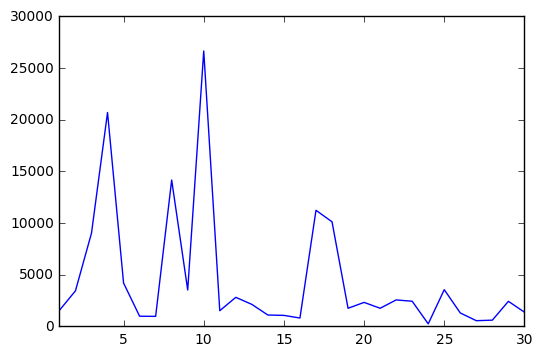

In [5]:
# We first save all the unique days in September
unique_days = flights[flights.MONTH == 9]["DAY_OF_MONTH"].unique()
print unique_days

# We create a series with the total weather delay per day, using the day as index
total_weather_delay = pd.Series([flights[flights.DAY_OF_MONTH == day]["WEATHER_DELAY"].sum() for day in unique_days],
                               index = unique_days)


# Finally we plot the series
total_weather_delay.sort_index().plot()

# QUESTION 1.5: The plot shows us that 10th of September was the most weather delayed day.

**Question 1.6 [10 points]** 

On a bar chart plot the airline carriers (UNIQUE_CARRIER's) by their average arrival delays, ordered from worse delay to the least.  *Ignore flights that arrive early (i.e. their ARR_DELAY is less than 0).*

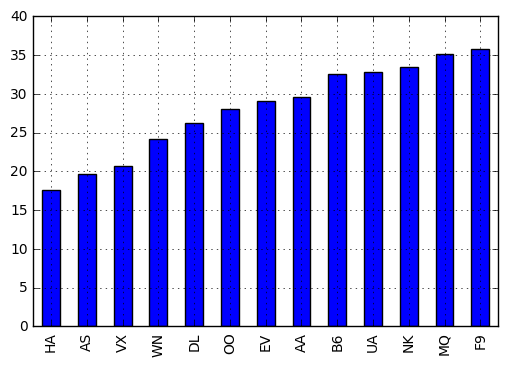

In [38]:
# store all the unique carries
carriers = flights["UNIQUE_CARRIER"].unique()

# calculating a series containing the average arrival delays for each unqiue carrier where the ARR_DELAY > 0
# The index used is the carriers saved in the variable above.
# We also sort the series based on the values.
arrival_delay_means = pd.Series([flights[(flights.UNIQUE_CARRIER == carrier) & (flights.ARR_DELAY > 0)]["ARR_DELAY"].mean()
                       for carrier in carriers], index = carriers).sort_values()

# We plot the results
arrival_delay_means.plot(kind = "bar")

**Question 1.7 [10 points]** 

Create a histogram showing the arrival delays for Chicago (airport code 'ORD').

- Include both early and late flights, ARR_DELAY will be positive and negative.
- Set the domain for the histogram to show flights that are up to one hour early to flights that are 2 hours late.
- Set the bin size for the flights to be 5 mins.

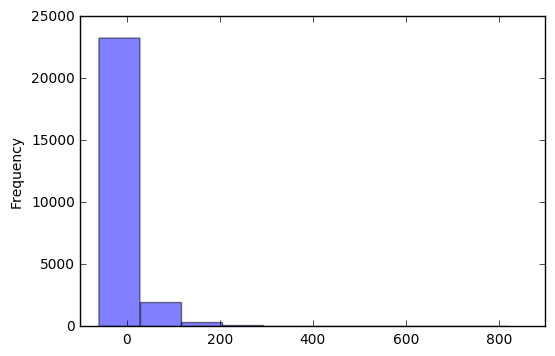

In [67]:
values = pd.Series(flights[flights.DEST == "ORD"]["ARR_DELAY"]).sort_values()
values.plot.hist(alpha=0.5)

## Part 2 [20 points in total]

This flight delay data can be used to estimate the arrival delay given a route and a day of the week, and we will leverage this data to create a booking recomender function. In this part the aim is to create a python function that will help when booking a flight by alerting if the selected route and day of the week is one that has had delays in the past.

This will use the same dataframe used in Part 1 as a starting point, but will focus on the following columns: ORIGIN, DEST, DAY_OF_WEEK. In order to calculate delays use the ARR_DELAY column.

Step 1: Calculate for each combination of origin airport code (ORIGIN), destination airport code (DEST) and day of the week (DAY_OF_WEEK) the median value of ARR_DELAY.

Step 2: Use the results calculated to write a python function. This function should accept three arguments: origin, destination and dayofweek. The function should use these to evaluate whether the median arr_delay for the selected combination of the arguments is greater than 0. 
- If this is the case then it should return a recomandation not to fly. 
- If the median arr_delay for the selected combination is less than or equal to 0 then the recomandation returned should be to go ahead and book the flight.

Step 1: Calculate for Calculate for each combination of origin airport code (ORIGIN), destination airport code (DEST) and day of the week (DAY_OF_WEEK) the median value of ARR_DELAY.

In [184]:
# We create a dataframe with the columns that we need.
flights_local = flights[["DAY_OF_WEEK","ORIGIN","DEST","ARR_DELAY"]]

# We first group the DataFrame by day origin and destination. The column left (ARR_DELAY) will be used to calculate
# the median for the route on the specific day. 
# We set as_index to false so that we do not use a MultiIndex system (Hierarchical)
flights_delays = flights_local.groupby(["DAY_OF_WEEK", "ORIGIN","DEST"], as_index = False).median()

#print days_dict

Step 2:
Use the results calculated in Step 1 to write a python function. This function should accept three arguments: origin, destination and dayofweek. The function should use these to evaluate whether the median arr_delay for the selected combination of the arguments is greater than 0. 
    
    
If this is the case then it should return a recomandation not to fly. 
If the median arr_delay for the selected combination is less than or equal to 0 then the recomandation returned should be to go ahead and book the flight.

Write your function in the space below.

In [187]:
def toFlyOrNotToFly(origin, destination, dayofweek):
    if flights_delays[(flights_delays.ORIGIN == origin)&(flights_delays.DEST == destination)&
                      (flights_delays.DAY_OF_WEEK == dayofweek)]["ARR_DELAY"].item() > 0:
        return "You shouldn't fly!!!"
    else:
        return "You can fly on this day. Have a nice trip!"

To fly or not to fly... from San Francisco to New York on a Thursday?

Call the function you have defined in Step 2 with an origin airport code of SFO and destination of JFK and a day of the week equal to Thursday.

In [188]:
print toFlyOrNotToFly("SFO","JFK",2)

You can fly on this day. Have a nice trip!


## Part 3 [25 points in total]


Create an interactive ipythonwidget that allows the user make a selection of flights based on the following criteria:
- select flights arriving at particular airport
- select flights being conducted by a particular carrier
- select flights being conducted by a particular carrier and arriving at a particular airport
- select all flights (no airport and no carrier are selected).

Use the [interact()](https://github.com/ipython/ipywidgets/blob/master/examples/notebooks/Using%20Interact.ipynb) function, as you have done before in order to provide a set of options of carrier and airport codes for the user to make a selections.  To get a set of airport codes and carrier codes, you may do one of the following:
* manually select at least 10 airport codes and carrier codes from the data set
* get the set of airport codes and carrier codes from the flight data (create a ```set()``` from the appropriate columns in the ```flights``` Pandas DataFrame).
* csv files containing the carrier and airport codes are provided in the data/ directory

Using that selection of flights, plot two histograms side-by-side:
- The histogram on the left shows the arrival delays for flights scheduled to arrive in the morning, 4:00am (0400 hours) to 12pm (1200 hours)
- The histogram on the right shows the arrival delays for flights scheduled to arrive in the afternoon and evening, 12pm (1200 hours) to 4:00am (2359 hours, 0000 hours to 0400 hours)
(*Hint*: use [pd.concat](http://pandas.pydata.org/pandas-docs/stable/merging.html) to concatenate pandas dataframe for different arrival time selections).

Use the same parameters for the histogram as in the previous questions, that is:
- show flights that arrive up to one hour early to flights that arrive up to 2 hours late
- bin size of 5 minutes
- also set the y-axis to show the same y-limits so that you can compare both histograms to each other

# THIS ASSIGNMENT IS DUE ON KEATs BY
# SUNDAY 27th NOVEMBER 23:55

### Turn in the following

* Submit your completed Jupyter Notebook ***ONLY*** in the Coursework 2 Submission under **Coursework 2** on KEATs.  There is no need to re-upload the flight data.
* You should not require adding any additional data for this assignment, the grader will use the same data/ that is provided to you to test your code.


### Point Breakdown (Worth 5% of your course grade)

Question | Points
--- | ---
Part 1 Question 1.1 |   5 points
Part 1 Question 1.2 |  10 points
Part 1 Question 1.3 | 5 points
Part 1 Question 1.4 |  10 points
Part 1 Question 1.5 | 10 points
Part 1 Question 1.6 |  5 points
Part 1 Question 1.7 | 10 points
Part 2 | 20 points
Part 3 | 25 points
**Total Number of Points** | 100 points


